In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Различия методов дифференцирования

Многие законы природы сформулированы с использованием производных. Далеко не всегда эти производные можно посчитать аналитически. В задачах численного моделирования функции заданные на областях в $\mathbb R^d$ приходится приближать неким подмножеством функций, образующих конечномерное пространство, так как в компьютере можно хранить только конечное количество коэффициентов. Зная такую приближенную функцию возникает вопрос, как можно оценить производную приближаемой функции наиболее точно? В простейшем случае функция $f:\mathbb R\to\mathbb R$ задана своими значениями $f(x)$ и $f(x+h)$ на паре точек $x$ и $x+h$, прочие же значения приближенно получаются тем или иным способом интерполяции. Исходя из определения производной, ее можно приблизить отношением приращения функции к приращению аргумента:
$$f'(x)\approx\frac{f(x+h)-f(x)}{h}.$$
Для любого конечного приращения $h$ аргумента ответ будет получаться ошибочным, однако ошибка должна уменьшаться при приращении стремящемся к нулю $h\to 0$.
Проверим, какую минимальную погрешность можно получить в приближенной арифметике.

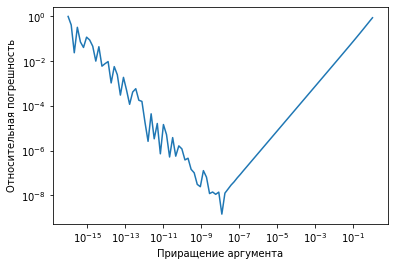

In [2]:
def f(x): return np.sin(x) # Функция 
def dfdx(x): return np.cos(x) # и ее производная.

x0 = 1 # Точка, в которой производится дифференциирование.
dx = np.logspace(-16, 0, 100) # Приращения аргумента.

# Найдем приращения функции
df = f(x0+dx)-f(x0)
# и оценим производные.
approx_dfdx = df/dx

# Вычислим точное значение производной 
exact_dfdx = dfdx(x0)
# и вычислим относительные погрешности.
relative_error = np.abs(1.0-approx_dfdx/exact_dfdx)

# Строим график зависимости погрешности от приращения.
plt.loglog(dx, relative_error)
plt.xlabel("Приращение аргумента")
plt.ylabel("Относительная погрешность")
plt.show()

Как мы видим, погрешность не стремиться к нулю, а достигает своего минимума при шагах около $10^{-8}$, затем снова растет. 

## Задание

1. Объясните график ошибки. Почему ошибка сначала уменьшается, но потом растет? По какому закону происходит уменьшение и рост ошибки?

2. Для произвольной функции, оцените величину шага, при котором ошибка приближения производной минимальна. Какова минимальная ошибка такого метода приближения?

Выражение $f(x+h)-f(x)$ называется прямой конечной разностью функции $f$ в точке $x$, будем обозначать ее $\Delta_+ f$. Также часто рассматривают обратную конечную разность $\Delta_- f=f(x)-f(x-h)$ и центральную конечную разность $\Delta_0 f=f(x+\frac h2)-f(x-\frac h2)$.
Постренные по конечным разностям разделенные разности могут использоваться для оценки производной:
$$f'(x)\approx \frac{\Delta_+ f}{h}\approx \frac{\Delta_- f}{h}\approx \frac{\Delta_0 f}{h}.$$
Сравним погрешности приближений.

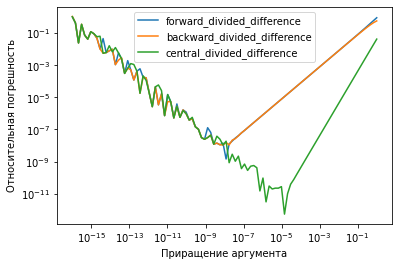

In [3]:
def experiment(method, f=np.sin, dfdx=np.cos, x0=1, dx = np.logspace(-16, 0, 100)):
    """
    Оценивает производную `f` с помощью функции `method`, сравнивает со значением аналитической 
    производной `dfdx`, и строит график относительной ошибки от приращения аргумента.
    Оценка производной производиться функцией `method(f, x0, dx)` принимающей на вход
    функцию `f`, которая дифференцруется в точке `x0`, используя приращения `dx`; 
    функция `method` возвращает вектор значений производной на всех переданных приращениях `dx`.
    """
    approx_dfdx = method(f, x0, dx) # Оценка производных.
    exact_dfdx = dfdx(x0) # Точное значение производной.
    relative_error = np.abs(1.0-approx_dfdx/exact_dfdx) # Относительные погрешности.

    plt.loglog(dx, relative_error, label=method.__name__)
    plt.xlabel("Приращение аргумента")
    plt.ylabel("Относительная погрешность")
    return relative_error

def forward_divided_difference(f, x0, dx):
    """
    Прямая разделенная разность.
    """
    return (f(x0+dx)-f(x0))/dx

def backward_divided_difference(f, x0, dx):
    """
    Обратная разделенная разность.
    """
    return (f(x0)-f(x0-dx))/dx

def central_divided_difference(f, x0, dx):
    """
    Центральная разделенная разность.
    """
    return (f(x0+dx/2)-f(x0-dx/2))/dx


# Строим график зависимости погрешности от приращения.
experiment(forward_divided_difference)
experiment(backward_divided_difference)
experiment(central_divided_difference)
plt.legend()
plt.show()

## Задание

3. Объясните, почему прямая и обратная разделенные разности дают одинаковую погрешность, а центральная конечная разность дает более точный ответ?

4. Для произольной фукнции оцените скорость уменьшения ошибка для центральной конечной разности. Как зависит скорость от гладкости функции?

5. Какова минимальная погрешность для вычисления центральной конечной разности?

В некоторых случаях известно аналитическое выражение для дифференцируемой функции, однако аналитическое выражение для производной слишком громоздко, чтобы использовать его в вычислениях. В этом случае удобно использовать метод автоматического дифференцирования. Идея метода заключается в том, что вместе со значением функции хранится значение производной функции в этой точке, т.е. все функции вычисляют пару  $(f(x), f'(x))$.
Вычисления начинают со значения $(x, 1)$ (производная $x$ по $x$ равна $1$), затем пользуются правилом дифференцирования сложной функции, например, при счете $\sin(f(x))$ уже найденные значения $f(x)$ преобразуются следующим образом:

$$(f(x),f'(x))\mapsto (\sin(f(x)),\cos(f(x))f'(x)).$$

В настоящее время существует множество пакетов для автоматического дифференцирования, например, [autograd](https://github.com/HIPS/autograd), также см. библиотеки для работы с искуственными нейронными сетями.
С педагогическими целями реализуем простой класс для автоматического дифферецирования. 

In [4]:
class AG:
    def __init__(self, v, d):
        """
        Инициализирует пару (f, df/dx) = (v, d).
        """
        self.v = v
        self.d = d
        
    # Представление констант
    @staticmethod
    def const(x):
        return AG(x, 1)
    
    # Арифметические операции
    def __add__(self, other):
        return AG(self.v+other.v, self.d+other.d)
    def __sub__(self, other):
        return AG(self.v-other.v, self.d-other.d)
    def __mul__(self, other):
        return AG(self.v*other.v, self.d*other.v+self.v*other.d)
    def __truediv__(self, other):
        return AG(self.v/other.v, (self.d*other.v-self.v*other.d)/(other.v**2) )
    
    # Возведение в степень
    def __pow__(self, other):
        return AG(np.power(self.v, other.v), np.power(self.v,other.v-1.)*other.v*self.d 
                                           + np.power(self.v,other.v)*np.log(self.v)*other.d )
    
    # Основные функции
    @staticmethod
    def sin(x):
        return AG(np.sin(x.v), np.cos(x.v)*x.d)

    @staticmethod
    def cos(x):
        return AG(np.cos(x.v), -np.sin(x.v)*x.d)
    
    @staticmethod
    def log(x):
        return AG(np.log(x.v), x.d/x.v)    

    
x = AG.const(3)
y = x*x/x
print(f"y({x.v})={y.v} y'({x.v})={y.d}")

y(3)=3.0 y'(3)=1.0


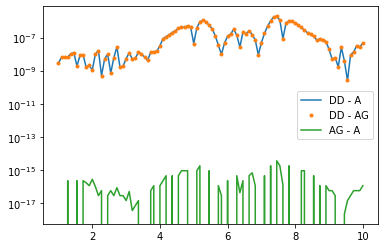

In [5]:
# Сравним автоматическое дифференцирование с другими способами счета.

# Сложная фукнция
def f(x): return x**AG.sin(x**AG.cos(x)) 

# и ее еще более сложная аналитическая производная
def dfdx(x): 
    return x**AG.sin(x**AG.cos(x))*(
        x**AG.cos(x)*AG.cos(x**AG.cos(x))*AG.log(x)*(AG.cos(x)/x - AG.log(x)*AG.sin(x)) 
        + AG.sin(x**AG.cos(x))/x
    )

# Точки для оценки производной.
x0 = np.linspace(1,10,100)

# Шаг для конечной разности.
h = 1e-8

# Оценка производной через центральную разделенную разность.
divided_difference = ( f(AG.const(x0+h/2)).v - f(AG.const(x0-h/2)).v )/h

# Аналитический ответ.
analytic = dfdx( AG.const(x0) ).v

# Автоматическое дифференцирование.
autograd = f( AG.const(x0) ).d

def abs_err(x, y):
    """Считает абсолютную ошибку."""
    return np.abs(x-y)

# Сравниваем три результата между собой.
plt.semilogy(x0, abs_err(divided_difference, analytic), label="DD - A")
plt.semilogy(x0, abs_err(divided_difference, autograd), '.', label="DD - AG")
plt.semilogy(x0, abs_err(autograd, analytic), label="AG - A")
plt.legend()
plt.show()

Приближение через конечные разности дает ожидаемо большую погрешность. Аналитическая формула и автоматичесое дифференцирование дает очень похожие, но все же отличающиеся результаты.

## Задания

6. Реализуйте автоматическое дифференцирование для вычисления арктангенса.

7. Реализуйте автоматическое дифферецирование для двух переменных (можно ограничиться только арифметикой).

8. Какой ответ получается точнее: через автоматическое дифференцирование или через аналитическое выражение для производной, полученное через символьную алгербру (например, [Wolfram Alpha](https://www.wolframalpha.com/))? Что быстрее считается?

При решении сеточными методами дифференциальных уравнений или уравнений в частных производных функцию обычно нельзя вычислять в произвольных точках, так как она известна только в узлах решетки.
Например, функция $f(x)$ может быть задана в узлах равномерной решетки $x_k=kh$, где $h$ задает плотность решетки.
В этом случае производная должна выражаеться через значения функции в узлах $x_k$.
Например, через центральную конечную разность
$$f'(x_k) \approx \frac{f(x_{k+1})-f(x_{k-1})}{x_{k+1}-x_{k-1}}$$
или через прямую конечную разность:
$$f'(x_k) \approx \frac{f(x_{k+1})-f(x_{k})}{x_{k+1}-x_{k}}.$$
Как мы знаем, центральная конечная разность точнее, но шаг аргумента в этом случае в два раза больше.

Чтобы воспользоваться более точными оценками производной, но не увеличивать шаг интегрирования, функцию и ее производную можно задавать на разных решетках.
Например, в качестве узлов новой решетки можно выбрать точки между старыми узлами на ранвом расстоянии от соседей. 

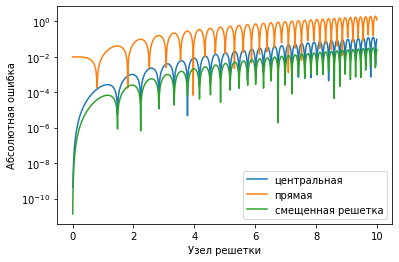

In [6]:
# Сравним погрешности прямой и центральной разделенной разности на решетке.
def f(x): return np.sin(x**2) # Функция
def dfdx(x): return 2*x*np.cos(x**2) # и ее производная

# Зададим решетку
xk = np.linspace(0,10,1000)

# Вычислим на ней функцию
fk = f(xk)

# Приближенные значения производной:
central_dfdx = np.empty_like(xk); central_dfdx[:] = np.nan
central_dfdx[1:-1] = (fk[2:]-fk[:-2])/(xk[2:]-xk[:-2])

forward_dfdx = np.empty_like(xk); forward_dfdx[:] = np.nan
forward_dfdx[:-1] = (fk[1:]-fk[:-1])/(xk[1:]-xk[:-1])


# Точные значения производной
exact_dfdx = dfdx(xk)

yk = (xk[1:]+xk[:-1])/2 # Смещенная решетка.
shifted_dfdx = (fk[1:]-fk[:-1])/(xk[1:]-xk[:-1]) # Оценка центральной разделенной разностью.
exact_shifted = dfdx(yk) # Точные значения на смещенной решетке

plt.semilogy(xk, abs_err(central_dfdx, exact_dfdx), label="центральная")
plt.semilogy(xk, abs_err(forward_dfdx, exact_dfdx), label="прямая")
plt.semilogy(yk, abs_err(shifted_dfdx, exact_shifted), label="смещенная решетка")
plt.xlabel("Узел решетки")
plt.ylabel("Абсолютная ошибка")
plt.legend()
plt.show()

## Задание

9. Объясните различия в точностях приближения центральной и прямой разделенными разностями.

10. Точность приближения можно увеличить, уменьшая шаг решетки $h$, что приводит к увеличинию числа узлов
и пропорциональному увеличению времени работы. Сколько памяти и времени можно сэкономить, используя центральную разность?

11. Как изменится результат, если шаги решетки не будут постоянными?

12. Чтобы получить на произвольной решетке такой же аккуратный результат, как центральная разность на равномерной решетке, необходимо использовать три соседних узла $x_{k-1}$, $x_k$ и $x_{k+1}$, чтобы получить производную в $x_k$. Выведите соответствующую формулу и проведите численный эксперимент для оценки погрешности.

13. Выведите формулу для оценки производной с погрешностью $O(h^4)$ на равномерной решетке, используя значения функции в четырех узлах.


Аналогично первым производным, можно оценивать и производные более высокого порядка.
Например, прямая конечная разность, примененная к прямой конечной разности, 
дает оценку для производной второго порядка:

$$
f''(x)\approx\frac{\Delta_+ \Delta_+ f}{h^2}
=\frac{f(x+2h)-2f(x+h)+f(x)}{h^2}.
$$

Возможны и другие варианты оценки второй производной:

$$
f''(x)\approx\frac{\Delta_0 \Delta_0 f}{h^2}
=\frac{\Delta_+ \Delta_- f}{h^2}
=\frac{f(x+h)-2f(x)+f(x-h)}{h^2}.
$$


# Задание

14. Сравните теоретически и экспериментально погрешности для оценки второй производной через прямую и центральную вторые разделенные разности.

15. Получите и проверьте формулу для оценки второй производной с точностью $O(h^4)$. Сколько узлов для этого нужно использовать?

Для функции нескольких переменных часто необходимо вычислять частные производные. 
Рассуждения при этом аналогичны анализу функции одной переменной, однако нужно быть аккуратным, отслеживая расположение решеток для функций и их производных.
Ограничимся функцией двух переменных $f(x,y)$, заданной в узлах решетки $f(x_k,y_j)=f_{kj}$.
Для таких функций часто нужно вычислять градиент
$$\mathrm{grad}\, f=(\frac{\partial f}{\partial x},\frac{\partial f}{\partial y})=F,$$
дивергенцию
$$\mathrm{div}\, F=\frac{\partial F_x}{\partial x}+\frac{\partial F_y}{\partial y},$$
и оператор Лапласа
$$\Delta f=\mathrm{div}\,\mathrm{grad}\, f.$$


## Задание

16. Используя двухточечную оценку для производных, предъявите оптимальный выбор для решеток, на которых заданы градиент, дивергенция и лапласиан.